In [36]:
import pandas as pd
import numpy as np
from transformers import pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
tweet_replies_predictions_feb_2019_en =pd.read_csv('/work/ptyagi/masterthesis/tmp/tweet_replies_predictions_feb_2019_en.csv')

In [4]:
tweet_replies_predictions_feb_2019_en.head()

,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,emotion_confidence_roberta_large,reply_emotion_bart,emotion_confidence_bart
0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,0.972646,optimism,0.621922
1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,0.980633,anticipation,0.234829
2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,0.700554,pessimism,0.322435
3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,0.954299,pessimism,0.411842
4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,0.993971,disgust,0.301617


In [18]:
emotion_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion-latest", top_k=3, device=3)

In [19]:
emotion_predictions = emotion_classifier(tweet_replies_predictions_feb_2019_en['replies'].tolist(), batch_size=8)

In [21]:
emotion_predictions[0]

[{'label': 'anger', 'score': 0.9626848101615906},
 {'label': 'disgust', 'score': 0.860825777053833},
 {'label': 'joy', 'score': 0.23503410816192627}]

In [22]:
top_3 = [[tuple(item['label'] for item in sublist), tuple(item['score'] for item in sublist)] for sublist in emotion_predictions]

labels_col = [x[0] for x in top_3] 
scores_col = [x[1] for x in top_3]  

tweet_replies_predictions_feb_2019_en['top_3_labels_roberta_base'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_roberta_base'] = scores_col

In [23]:
tweet_replies_predictions_feb_2019_en.head()

,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,emotion_confidence_roberta_large,reply_emotion_bart,emotion_confidence_bart,top_3_labels_roberta_base,top_3_scores_roberta_base
0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,0.972646,optimism,0.621922,"(anger, disgust, joy)","(0.9626848101615906, 0.860825777053833, 0.2350..."
1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,0.980633,anticipation,0.234829,"(optimism, joy, trust)","(0.9835257530212402, 0.7558496594429016, 0.317..."
2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,0.700554,pessimism,0.322435,"(anger, disgust, anticipation)","(0.3523235321044922, 0.23993079364299774, 0.04..."
3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,0.954299,pessimism,0.411842,"(optimism, joy, anger)","(0.8389987945556641, 0.58051598072052, 0.39537..."
4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,0.993971,disgust,0.301617,"(anger, disgust, sadness)","(0.9850420355796814, 0.9834210276603699, 0.399..."


In [24]:
emotion_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-large-emotion-latest", top_k=3, device=3)

In [25]:
emotion_predictions = emotion_classifier(tweet_replies_predictions_feb_2019_en['replies'].tolist(), batch_size=8)

In [26]:
emotion_predictions[0]

[{'label': 'anger', 'score': 0.9726458191871643},
 {'label': 'disgust', 'score': 0.8819092512130737},
 {'label': 'joy', 'score': 0.16582560539245605}]

In [27]:
top_3 = [[tuple(item['label'] for item in sublist), tuple(item['score'] for item in sublist)] for sublist in emotion_predictions]

labels_col = [x[0] for x in top_3] 
scores_col = [x[1] for x in top_3]  

tweet_replies_predictions_feb_2019_en['top_3_labels_roberta_large'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_roberta_large'] = scores_col

In [28]:
tweet_replies_predictions_feb_2019_en.head()

,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,emotion_confidence_roberta_large,reply_emotion_bart,emotion_confidence_bart,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large
0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,0.972646,optimism,0.621922,"(anger, disgust, joy)","(0.9626848101615906, 0.860825777053833, 0.2350...","(anger, disgust, joy)","(0.9726458191871643, 0.8819092512130737, 0.165..."
1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,0.980633,anticipation,0.234829,"(optimism, joy, trust)","(0.9835257530212402, 0.7558496594429016, 0.317...","(optimism, joy, anticipation)","(0.9806329607963562, 0.7929828763008118, 0.226..."
2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,0.700554,pessimism,0.322435,"(anger, disgust, anticipation)","(0.3523235321044922, 0.23993079364299774, 0.04...","(joy, anticipation, anger)","(0.700554370880127, 0.14450152218341827, 0.116..."
3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,0.954299,pessimism,0.411842,"(optimism, joy, anger)","(0.8389987945556641, 0.58051598072052, 0.39537...","(joy, anger, disgust)","(0.9542987942695618, 0.3874838948249817, 0.311..."
4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,0.993971,disgust,0.301617,"(anger, disgust, sadness)","(0.9850420355796814, 0.9834210276603699, 0.399...","(anger, disgust, sadness)","(0.9939709901809692, 0.9895362854003906, 0.089..."


In [31]:
bart_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=3)

/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [46]:
classification_results = []
for i in range(0, len(tweet_replies_predictions_feb_2019_en), 32):
    batch = tweet_replies_predictions_feb_2019_en['replies'][i:i + 32].tolist()
    outputs = bart_classifier(batch,
        candidate_labels = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"],
        multi_label = True)
    classification_results.extend(outputs)


In [53]:
classification_results[0]

{'sequence': 'Go Trump!!',
 'labels': ['optimism',
  'joy',
  'surprise',
  'anticipation',
  'trust',
  'anger',
  'pessimism',
  'love',
  'fear',
  'disgust',
  'sadness'],
 'scores': [0.9860696196556091,
  0.9570428133010864,
  0.3528136610984802,
  0.2843059301376343,
  0.039263300597667694,
  0.00586162693798542,
  0.0001794684649212286,
  0.00017271097749471664,
  7.59223330533132e-05,
  5.2224953833501786e-05,
  3.389388439245522e-05]}

In [54]:
result = []
for entry in classification_results:
    sorted_items = sorted(zip(entry['labels'], entry['scores']), key=lambda x: x[1], reverse=True)
    
    top_labels = tuple(label for label, score in sorted_items[:3])
    top_scores = tuple(score for label, score in sorted_items[:3])
    
    result.append([top_labels, top_scores])

In [55]:
labels_col = [x[0] for x in result] 
scores_col = [x[1] for x in result]  

tweet_replies_predictions_feb_2019_en['top_3_labels_bart'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_bart'] = scores_col

In [56]:
tweet_replies_predictions_feb_2019_en.to_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [42]:
tweet_replies_predictions_feb_2019_en = pd.read_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [43]:
annotated_df = pd.read_csv('/work/ptyagi/masterthesis/tmp/annotation.csv')

In [44]:
merged_df = pd.merge(annotated_df[['id','manual_label']], tweet_replies_predictions_feb_2019_en, on='id', how='left')

In [45]:
merged_df.drop(columns=['Unnamed: 0'], inplace=True)

In [46]:
merged_df.dropna(subset='manual_label', inplace=True)

In [47]:
tuple_columns = ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart']

for col in tuple_columns:
    merged_df[col] = merged_df[col].apply(ast.literal_eval)

In [48]:
def exact_match(row, col):
    return row['manual_label'] == row[col][0] 

def top_k_accuracy(row, col, k=3):
    return row['manual_label'] in row[col][:k]

def ranked_score(row, col):
    try:
        rank = row[col].index(row['manual_label']) + 1
        return 1 / rank  
    except ValueError:
        return 0 
def ndcg_k(row, col, k=3):
    top_k_preds = row[col][:k]
    dcg = 0
    for i, pred in enumerate(top_k_preds):
        if pred == row['manual_label']:
            dcg += 1 / np.log2(i + 2)  
    idcg = 1  
    return dcg / idcg


for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart']:
    merged_df[f'{model}_Exact_Match'] = merged_df.apply(exact_match, col=model, axis=1)
    merged_df[f'{model}_Top3_Accuracy'] = merged_df.apply(top_k_accuracy, col=model, axis=1)
    merged_df[f'{model}_Ranked_Score'] = merged_df.apply(ranked_score, col=model, axis=1)
    merged_df[f'{model}_NDCG@3'] = merged_df.apply(ndcg_k, col=model, axis=1)

exact_match_avg = merged_df[[f'{model}_Exact_Match' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart']]].mean()
top3_accuracy_avg = merged_df[[f'{model}_Top3_Accuracy' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart']]].mean()
ranked_score_avg = merged_df[[f'{model}_Ranked_Score' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart']]].mean()
ndcg_avg = merged_df[[f'{model}_NDCG@3' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart']]].mean()

results = pd.DataFrame({
    'Metric': ['Exact Match', 'Top 3 Accuracy', 'Ranked Score', 'NDCG@3'],
    'Roberta_base': [exact_match_avg.iloc[0], top3_accuracy_avg.iloc[0], ranked_score_avg.iloc[0], ndcg_avg.iloc[0]],
    'Roberta_large': [exact_match_avg.iloc[1], top3_accuracy_avg.iloc[1], ranked_score_avg.iloc[1], ndcg_avg.iloc[1]],
    'BART': [exact_match_avg.iloc[2], top3_accuracy_avg.iloc[2], ranked_score_avg.iloc[2], ndcg_avg.iloc[2]]
})


In [49]:
results

,Metric,Roberta_base,Roberta_large,BART
0,Exact Match,0.629630,0.659259,0.251852
1,Top 3 Accuracy,0.844444,0.859259,0.600000
2,Ranked Score,0.724691,0.749383,0.397531
3,NDCG@3,0.755464,0.777686,0.449202


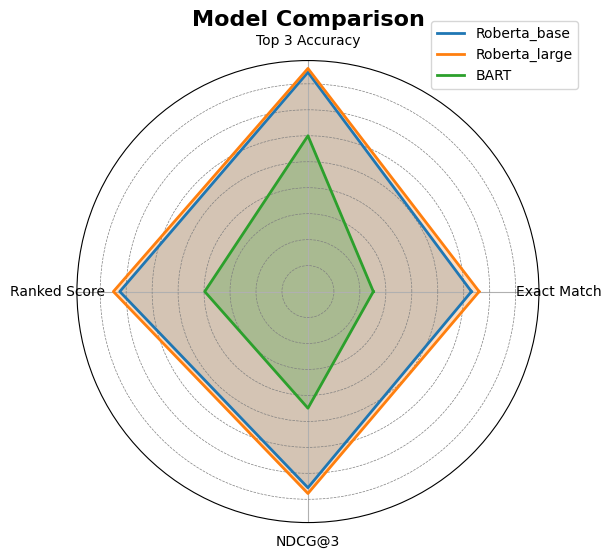

In [50]:
labels = results['Metric'].tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, model in enumerate(results.columns[1:]):
    values = results[model].tolist()
    values += values[:1] 
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.plot(angles, values, linewidth=2, label=model, color=colors[i])

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Model Comparison', fontsize=16, fontweight='bold')

ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), frameon=True, fontsize='medium')

plt.show()